<a href="https://colab.research.google.com/github/DrSewe/CNN_with_Tensorflow-Keras_for_Fashion_MNIST/blob/main/CNN_with_Tensorflow%7CKeras_for_Fashion_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <a id="1">Introduction</a>  


## Dataset

Fashion-MNIST is a dataset of Zalando's article images—consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes. Zalando intends Fashion-MNIST to serve as a direct drop-in replacement for the original MNIST dataset for benchmarking machine learning algorithms. It shares the same image size and structure of training and testing splits.


## Content

Each image is 28 pixels in height and 28 pixels in width, for a total of 784 pixels in total.   

Each pixel has a single pixel-value associated with it, indicating the lightness or darkness of that pixel, with higher numbers meaning darker. This pixel-value is an integer between 0 and 255.   

The training and test data sets have 785 columns.   

The first column consists of the class labels (see above), and represents the article of clothing.

The rest of 784 columns (1-785) contain the pixel-values of the associated image.

# <a id="2">Load packages</a>

In [3]:
import numpy as np
import pandas as pd
import os
import numpy as np
from google.colab import drive
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from tensorflow.python import keras
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Flatten, Conv2D, Dropout, MaxPooling2D
from IPython.display import SVG
from tensorflow.keras.utils import model_to_dot
from keras.utils import plot_model
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly import tools
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)


In [4]:
# Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


## Parameters

In [5]:
IMG_ROWS = 28
IMG_COLS = 28
NUM_CLASSES = 10
TEST_SIZE = 0.2
RANDOM_STATE = 2018
#Model
NO_EPOCHS = 50
BATCH_SIZE = 128

IS_LOCAL = False



# Check the contents of the directory where your dataset is stored on Google Drive
PATH = "/content/drive/My Drive/Minst/"
print(os.listdir(PATH))




# Constants for file paths
train_file = "/content/drive/MyDrive/Minst/fashion-mnist_train.csv"
test_file = "/content/drive/MyDrive/Minst/fashion-mnist_test.csv"

['fashion-mnist_test.csv', 't10k-images-idx3-ubyte', 'fashion-mnist_train.csv', 't10k-labels-idx1-ubyte', 'train-images-idx3-ubyte', 'train-labels-idx1-ubyte']


# <a id="3">Read the data</a>

There are 10 different classes of images, as following:

* **0**: **T-shirt/top**;   
* **1**: **Trouser**;   
* **2**: **Pullover**;   
* **3**: **Dress**;
* **4**: **Coat**;
* **5**: **Sandal**;
* **6**: **Shirt**;
* **7**: **Sneaker**;
* **8**: **Bag**;
* **9**: **Ankle boot**.

Image dimmensions are **28**x**28**.   

The train set and test set are given in two separate datasets.


In [6]:
# Read the train and test data from CSV files
train_data = pd.read_csv(train_file)
test_data = pd.read_csv(test_file)

# <a id="4">Data exploration</a>

![](http://)The dimmension of the original  train,  test set are as following:

In [7]:
# Display the first few rows of train and test data to verify the loading
print("Train data shape:", train_data.shape)
print("Test data shape:", test_data.shape)

Train data shape: (60000, 785)
Test data shape: (10000, 785)


## <a id="41">Class distribution</a>

Let's see how many number of images are in each class. We start with the train set.

### Train set images class distribution

In [8]:
# Create a dictionary for each type of label
labels = {0 : "T-shirt/top", 1: "Trouser", 2: "Pullover", 3: "Dress", 4: "Coat",
          5: "Sandal", 6: "Shirt", 7: "Sneaker", 8: "Bag", 9: "Ankle Boot"}

def get_classes_distribution(data):
    # Get the count for each label
    label_counts = data["label"].value_counts()

    # Get total number of samples
    total_samples = len(data)


    # Count the number of items in each class
    for i in range(len(label_counts)):
        label = labels[label_counts.index[i]]
        count = label_counts.values[i]
        percent = (count / total_samples) * 100
        print("{:<20s}:   {} or {}%".format(label, count, percent))

get_classes_distribution(train_data)

Pullover            :   6000 or 10.0%
Ankle Boot          :   6000 or 10.0%
Shirt               :   6000 or 10.0%
T-shirt/top         :   6000 or 10.0%
Dress               :   6000 or 10.0%
Coat                :   6000 or 10.0%
Sandal              :   6000 or 10.0%
Bag                 :   6000 or 10.0%
Sneaker             :   6000 or 10.0%
Trouser             :   6000 or 10.0%


The classes are equaly distributed in the train set (10% each). Let's check the same for the test set.    
Let's also plot the class distribution.



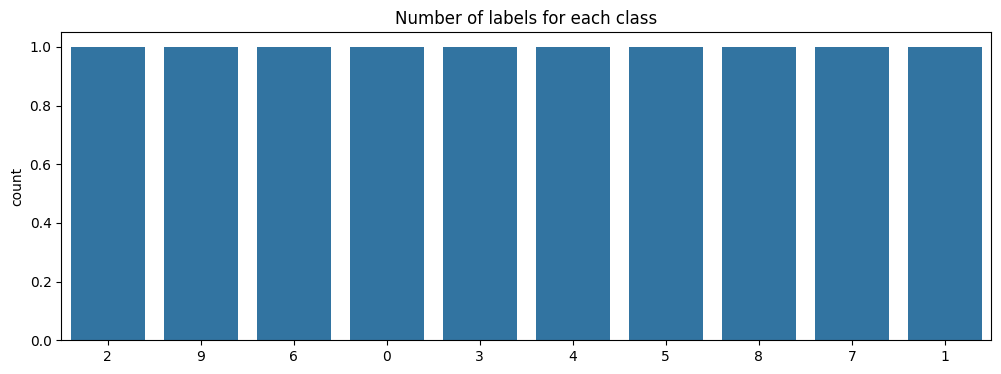

In [9]:
def plot_label_per_class(data):
    f, ax = plt.subplots(1,1, figsize=(12,4))
    g = sns.countplot(data.label, order = data["label"].value_counts().index)
    g.set_title("Number of labels for each class")

    for p, label in zip(g.patches, data["label"].value_counts().index):
        g.annotate(labels[label], (p.get_x(), p.get_height()+0.1))
    plt.show()

plot_label_per_class(train_data)

### Test set images class distribution

In [10]:
get_classes_distribution(test_data)

T-shirt/top         :   1000 or 10.0%
Trouser             :   1000 or 10.0%
Pullover            :   1000 or 10.0%
Dress               :   1000 or 10.0%
Bag                 :   1000 or 10.0%
Shirt               :   1000 or 10.0%
Sandal              :   1000 or 10.0%
Coat                :   1000 or 10.0%
Sneaker             :   1000 or 10.0%
Ankle Boot          :   1000 or 10.0%


Also in the test set the 10 classes are equaly distributed (10% each).  

Lets' also plot the class distribution.

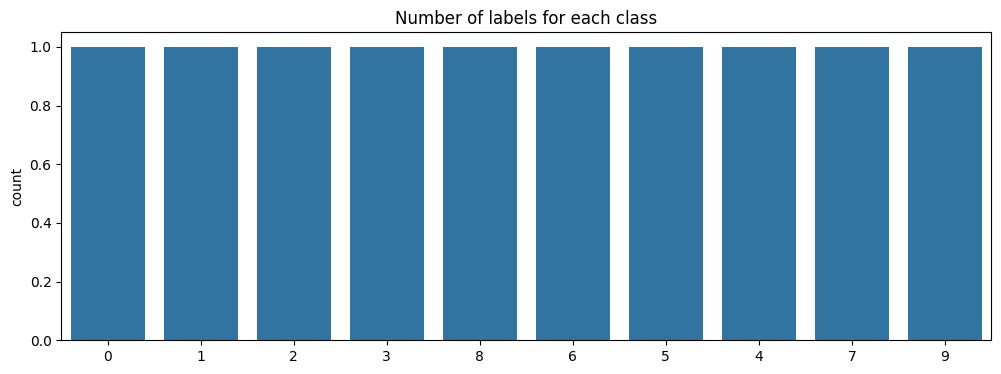

In [11]:
plot_label_per_class(test_data)

## <a id="42">Sample images</a>

### Train set images

Let's plot some samples for the images.   
We add labels to the train set images, with the corresponding fashion item category.  

In [12]:
def sample_images_data(data):
    # An empty list to collect some samples
    sample_images = []
    sample_labels = []

    # Iterate over the keys of the labels dictionary defined in the above cell
    for k in labels.keys():
        # Get four samples for each category
        samples = data[data["label"] == k].head(4)
        # Append the samples to the samples list
        for j, s in enumerate(samples.values):
            # First column contain labels, hence index should start from 1
            img = np.array(samples.iloc[j, 1:]).reshape(IMG_ROWS,IMG_COLS)
            sample_images.append(img)
            sample_labels.append(samples.iloc[j, 0])

    print("Total number of sample images to plot: ", len(sample_images))
    return sample_images, sample_labels

train_sample_images, train_sample_labels = sample_images_data(train_data)

Total number of sample images to plot:  40


Let's now plot the images.   
The labels are shown above each image.

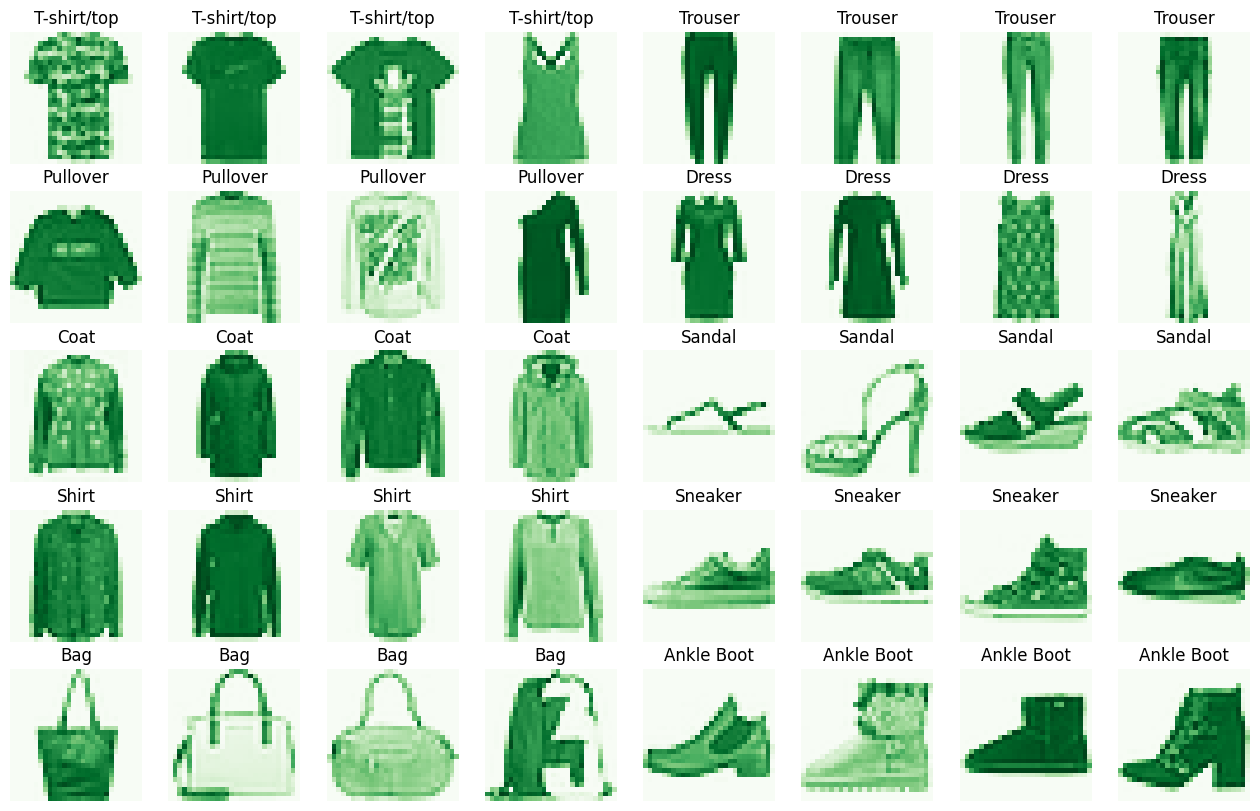

In [13]:
def plot_sample_images(data_sample_images,data_sample_labels,cmap="Blues"):
    # Plot the sample images now
    f, ax = plt.subplots(5,8, figsize=(16,10))

    for i, img in enumerate(data_sample_images):
        ax[i//8, i%8].imshow(img, cmap=cmap)
        ax[i//8, i%8].axis('off')
        ax[i//8, i%8].set_title(labels[data_sample_labels[i]])
    plt.show()

plot_sample_images(train_sample_images,train_sample_labels, "Greens")

### Test set images

Let's plot now a selection of the test set images.  
Labels are as well added (they are known).  

Total number of sample images to plot:  40


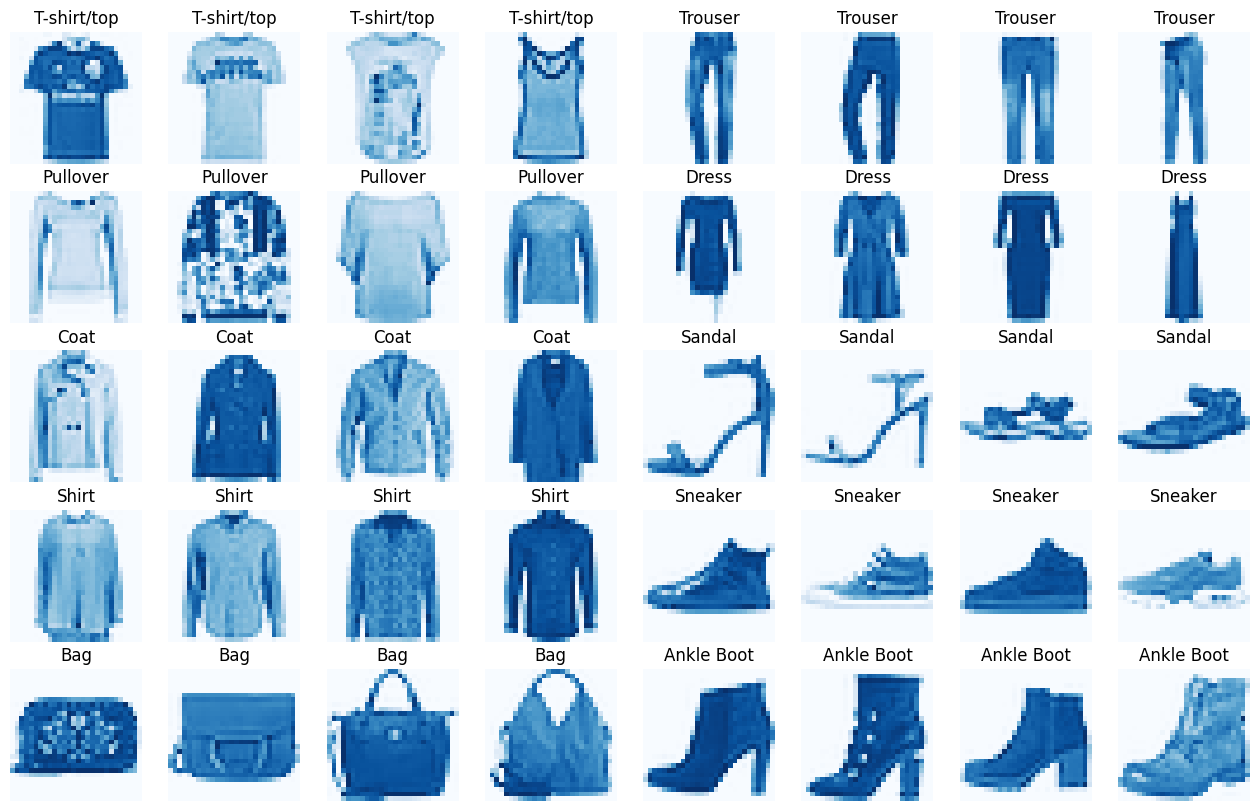

In [14]:
test_sample_images, test_sample_labels = sample_images_data(test_data)
plot_sample_images(test_sample_images,test_sample_labels)

# <a id="5">Model</a>

We start with preparing the model.

## <a id="51">Prepare the model</a>

## Data preprocessing

First we will do a data preprocessing to prepare for the model.

We reshape the columns  from (784) to (28,28,1). We also save label (target) feature as a separate vector.

In [15]:
# data preprocessing
# def data_preprocessing(raw):
#     out_y = keras.utils.to_categorical(raw.label, NUM_CLASSES)
#     num_images = raw.shape[0]
#     x_as_array = raw.values[:,1:]
#     x_shaped_array = x_as_array.reshape(num_images, IMG_ROWS, IMG_COLS, 1)
#     out_x = x_shaped_array / 255
#     return out_x, out_y

We process both the train_data and the test_data

In [16]:
import tensorflow as tf
from tensorflow.keras.utils import to_categorical

# data preprocessing
def data_preprocessing(raw):
    out_y = to_categorical(raw.label, NUM_CLASSES)
    num_images = raw.shape[0]
    x_as_array = raw.values[:,1:]
    x_shaped_array = x_as_array.reshape(num_images, IMG_ROWS, IMG_COLS, 1)
    out_x = x_shaped_array / 255
    return out_x, out_y

# prepare the data
X, y = data_preprocessing(train_data)
X_test, y_test = data_preprocessing(test_data)


## Split train in train and validation set

We further split the train set in train and validation set. The validation set will be 20% from the original train set, therefore the split will be train/validation of 0.8/0.2.

In [17]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=TEST_SIZE, random_state=RANDOM_STATE)

The dimmension of the processed train, validation and test set are as following:

In [18]:
print("Fashion MNIST train -  rows:",X_train.shape[0]," columns:", X_train.shape[1:4])
print("Fashion MNIST valid -  rows:",X_val.shape[0]," columns:", X_val.shape[1:4])
print("Fashion MNIST test -  rows:",X_test.shape[0]," columns:", X_test.shape[1:4])

Fashion MNIST train -  rows: 48000  columns: (28, 28, 1)
Fashion MNIST valid -  rows: 12000  columns: (28, 28, 1)
Fashion MNIST test -  rows: 10000  columns: (28, 28, 1)


Let's check the class inbalance for the rsulted training set.

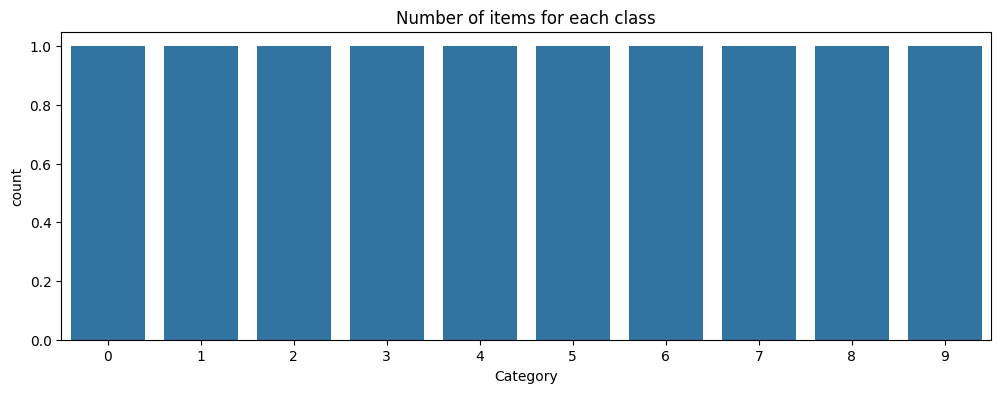

Dress               :   4891 or 10.189583333333333%
Sandal              :   4855 or 10.114583333333334%
Pullover            :   4836 or 10.075000000000001%
Ankle Boot          :   4827 or 10.05625%
Sneaker             :   4798 or 9.995833333333334%
Coat                :   4796 or 9.991666666666667%
Shirt               :   4779 or 9.95625%
Bag                 :   4757 or 9.910416666666666%
Trouser             :   4745 or 9.885416666666668%
T-shirt/top         :   4716 or 9.825000000000001%


In [19]:
def plot_count_per_class(yd):
    ydf = pd.DataFrame(yd)
    f, ax = plt.subplots(1,1, figsize=(12,4))
    g = sns.countplot(ydf[0], order = np.arange(0,10))
    g.set_title("Number of items for each class")
    g.set_xlabel("Category")

    for p, label in zip(g.patches, np.arange(0,10)):
        g.annotate(labels[label], (p.get_x(), p.get_height()+0.1))

    plt.show()

def get_count_per_class(yd):
    ydf = pd.DataFrame(yd)
    # Get the count for each label
    label_counts = ydf[0].value_counts()

    # Get total number of samples
    total_samples = len(yd)


    # Count the number of items in each class
    for i in range(len(label_counts)):
        label = labels[label_counts.index[i]]
        count = label_counts.values[i]
        percent = (count / total_samples) * 100
        print("{:<20s}:   {} or {}%".format(label, count, percent))

plot_count_per_class(np.argmax(y_train,axis=1))
get_count_per_class(np.argmax(y_train,axis=1))

And, as well, for the validation set.

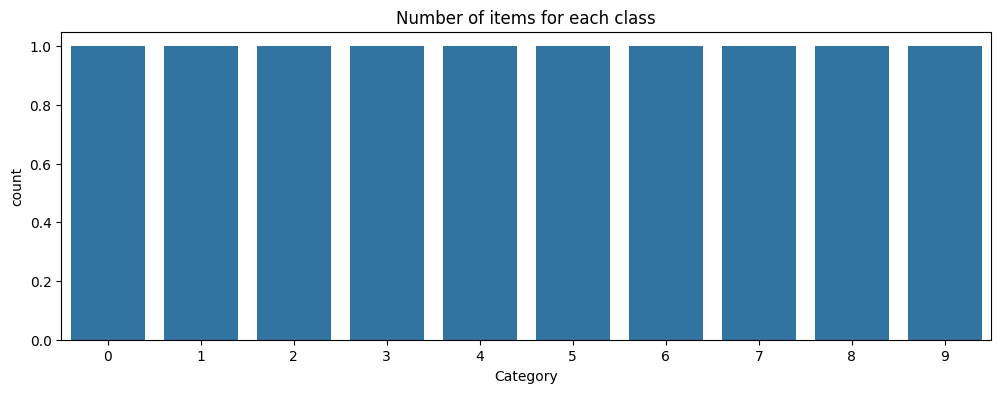

T-shirt/top         :   1284 or 10.7%
Trouser             :   1255 or 10.458333333333334%
Bag                 :   1243 or 10.358333333333333%
Shirt               :   1221 or 10.174999999999999%
Coat                :   1204 or 10.033333333333333%
Sneaker             :   1202 or 10.016666666666667%
Ankle Boot          :   1173 or 9.775%
Pullover            :   1164 or 9.700000000000001%
Sandal              :   1145 or 9.541666666666666%
Dress               :   1109 or 9.241666666666665%


In [20]:
plot_count_per_class(np.argmax(y_val,axis=1))
get_count_per_class(np.argmax(y_val,axis=1))

Both the train and validation set are unbalanced with respect of distribution of classes.

## <a id="52">Train the model</a>

### Build the model   



We will use a **Sequential** model.
* The **Sequential** model is a linear stack of layers. It can be first initialized and then we add layers using **add** method or we can add all layers at init stage. The layers added are as follows:

* **Conv2D** is a 2D Convolutional layer (i.e. spatial convolution over images). The parameters used are:
 * filters - the number of filters (Kernels) used with this layer; here filters = 32;
 * kernel_size - the dimmension of the Kernel: (3 x 3);
 * activation - is the activation function used, in this case `relu`;
 * kernel_initializer - the function used for initializing the kernel;
 * input_shape - is the shape of the image presented to the CNN: in our case is 28 x 28
 The input and output of the **Conv2D** is a 4D tensor.

* **MaxPooling2D** is a Max pooling operation for spatial data. Parameters used here are:
 * *pool_size*, in this case (2,2), representing the factors by which to downscale in both directions;

 * **Conv2D** with the following parameters:
 * filters: 64;
 * kernel_size : (3 x 3);
 * activation : `relu`;

* **MaxPooling2D** with parameter:
 * *pool_size* : (2,2);

* **Conv2D** with the following parameters:
 * filters: 128;
 * kernel_size : (3 x 3);
 * activation : `relu`;

* **Flatten**. This layer Flattens the input. Does not affect the batch size. It is used without parameters;

* **Dense**. This layer is a regular fully-connected NN layer. It is used without parameters;
 * units - this is a positive integer, with the meaning: dimensionality of the output space; in this case is: 128;
 * activation - activation function : `relu`;

* **Dense**. This is the final layer (fully connected). It is used with the parameters:
 * units: the number of classes (in our case 10);
 * activation : `softmax`; for this final layer it is used `softmax` activation (standard for multiclass classification)


Then we compile the model, specifying as well the following parameters:
* *loss*;
* *optimizer*;
* *metrics*.


In [21]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.utils import plot_model

# Model
model = Sequential()
# Add convolution 2D
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 kernel_initializer='he_normal',
                 input_shape=(IMG_ROWS, IMG_COLS, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64,
                 kernel_size=(3, 3),
                 activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(NUM_CLASSES, activation='softmax'))

# Compile the model
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer='adam',
              metrics=['accuracy'])



### Inspect the model

Let's check the model we initialized.

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 128)         73856     
                                                                 
 flatten (Flatten)           (None, 1152)              0

Let's also plot the model

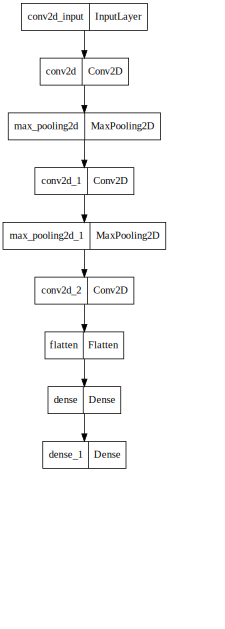

In [23]:
plot_model(model, to_file='model.png')
SVG(model_to_dot(model).create(prog='dot', format='svg'))

### Run the model

We run the model with the training set. We are also using the validation set (a subset from the orginal training set) for validation.

In [24]:
train_model = model.fit(X_train, y_train,
                  batch_size=BATCH_SIZE,
                  epochs=NO_EPOCHS,
                  verbose=1,
                  validation_data=(X_val, y_val))

Epoch 1/50
375/375 [==============================] - 49s 127ms/step - loss: 0.5507 - accuracy: 0.8004 - val_loss: 0.3765 - val_accuracy: 0.8639
Epoch 2/50
375/375 [==============================] - 44s 117ms/step - loss: 0.3446 - accuracy: 0.8750 - val_loss: 0.3263 - val_accuracy: 0.8857
Epoch 3/50
375/375 [==============================] - 45s 121ms/step - loss: 0.2930 - accuracy: 0.8931 - val_loss: 0.3039 - val_accuracy: 0.8917
Epoch 4/50
375/375 [==============================] - 44s 117ms/step - loss: 0.2601 - accuracy: 0.9051 - val_loss: 0.2906 - val_accuracy: 0.8956
Epoch 5/50
375/375 [==============================] - 43s 115ms/step - loss: 0.2313 - accuracy: 0.9140 - val_loss: 0.2760 - val_accuracy: 0.9002
Epoch 6/50
375/375 [==============================] - 43s 115ms/step - loss: 0.2085 - accuracy: 0.9234 - val_loss: 0.2729 - val_accuracy: 0.9043
Epoch 7/50
375/375 [==============================] - 45s 119ms/step - loss: 0.1857 - accuracy: 0.9310 - val_loss: 0.2640 - val_ac

## <a id="53">Test prediction accuracy</a>

We calculate the test loss and accuracy.

In [25]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.6942083835601807
Test accuracy: 0.9093000292778015


Test accuracy is  around  0.91.

We evaluated the model accuracy based on the predicted values for the test set.  Let's check the validation value during training.



## <a id="53">Validation accuracy and loss</a>

Let's plot the train and validation accuracy and loss, from the train history.

In [28]:
import plotly.graph_objs as go
from plotly.subplots import make_subplots
from plotly.offline import iplot

def create_trace(x, y, ylabel, color):
    trace = go.Scatter(
        x=x,
        y=y,
        name=ylabel,
        marker=dict(color=color),
        mode="markers+lines",
        text=x
    )
    return trace

def plot_accuracy_and_loss(train_model):
    hist = train_model.history
    acc = hist['accuracy']  # Change 'acc' to 'accuracy'
    val_acc = hist['val_accuracy']  # Change 'val_acc' to 'val_accuracy'
    loss = hist['loss']
    val_loss = hist['val_loss']
    epochs = list(range(1, len(acc) + 1))

    trace_ta = create_trace(epochs, acc, "Training accuracy", "Green")
    trace_va = create_trace(epochs, val_acc, "Validation accuracy", "Red")
    trace_tl = create_trace(epochs, loss, "Training loss", "Blue")
    trace_vl = create_trace(epochs, val_loss, "Validation loss", "Magenta")

    fig = make_subplots(rows=1, cols=2, subplot_titles=('Training and validation accuracy',
                                                         'Training and validation loss'))
    fig.add_trace(trace_ta, row=1, col=1)
    fig.add_trace(trace_va, row=1, col=1)
    fig.add_trace(trace_tl, row=1, col=2)
    fig.add_trace(trace_vl, row=1, col=2)
    fig.update_xaxes(title_text='Epoch', row=1, col=1)
    fig.update_xaxes(title_text='Epoch', row=1, col=2)
    fig.update_yaxes(title_text='Accuracy', range=[0, 1], row=1, col=1)
    fig.update_yaxes(title_text='Loss', range=[0, 1], row=1, col=2)

    iplot(fig, filename='accuracy-loss')

# Assuming train_model is the history object returned by model.fit(...)
plot_accuracy_and_loss(train_model)


The validation accuracy does not improve after few epochs and the validation loss is increasing after few epochs. This confirms our assumption that the model is overfitted. We will try to improve the model by adding Dropout layers.

## <a id="55">Add Dropout layers to the model</a>

We add several Dropout layers to the model, to help avoiding overfitting.    
Dropout is helping avoid overfitting in several ways, as explained in <a href='#8'>[6]</a> and <a href='#8'>[7]</a>.  


In [29]:
# Model
model = Sequential()
# Add convolution 2D
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 kernel_initializer='he_normal',
                 input_shape=(IMG_ROWS, IMG_COLS, 1)))
model.add(MaxPooling2D((2, 2)))
# Add dropouts to the model
model.add(Dropout(0.25))
model.add(Conv2D(64,
                 kernel_size=(3, 3),
                 activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
# Add dropouts to the model
model.add(Dropout(0.25))
model.add(Conv2D(128, (3, 3), activation='relu'))
# Add dropouts to the model
model.add(Dropout(0.4))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
# Add dropouts to the model
model.add(Dropout(0.3))
model.add(Dense(NUM_CLASSES, activation='softmax'))


model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer='adam',
              metrics=['accuracy'])

## <a id="56">Re-train the model</a>

Let's inspect first the model.

In [30]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 module_wrapper (ModuleWrap  (None, 13, 13, 32)        0         
 per)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                      

Let's also plot the model.

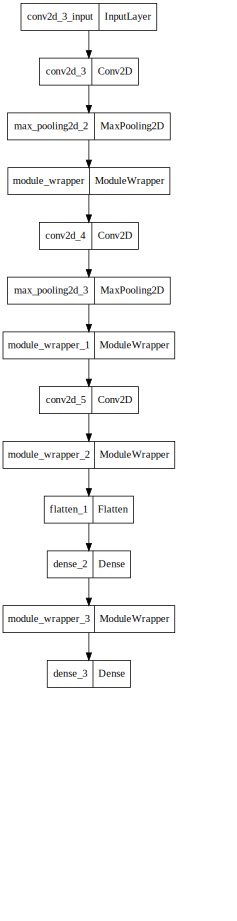

In [31]:
plot_model(model, to_file='model.png')
SVG(model_to_dot(model).create(prog='dot', format='svg'))

And now let's run the new model.

In [32]:
train_model = model.fit(X_train, y_train,
                  batch_size=BATCH_SIZE,
                  epochs=NO_EPOCHS,
                  verbose=1,
                  validation_data=(X_val, y_val))

Epoch 1/50
375/375 [==============================] - 63s 163ms/step - loss: 0.7482 - accuracy: 0.7230 - val_loss: 0.4588 - val_accuracy: 0.8333
Epoch 2/50
375/375 [==============================] - 47s 124ms/step - loss: 0.4831 - accuracy: 0.8208 - val_loss: 0.4052 - val_accuracy: 0.8505
Epoch 3/50
375/375 [==============================] - 51s 135ms/step - loss: 0.4128 - accuracy: 0.8465 - val_loss: 0.3342 - val_accuracy: 0.8818
Epoch 4/50
375/375 [==============================] - 48s 128ms/step - loss: 0.3777 - accuracy: 0.8608 - val_loss: 0.3131 - val_accuracy: 0.8861
Epoch 5/50
375/375 [==============================] - 47s 125ms/step - loss: 0.3539 - accuracy: 0.8709 - val_loss: 0.2890 - val_accuracy: 0.8959
Epoch 6/50
375/375 [==============================] - 48s 127ms/step - loss: 0.3305 - accuracy: 0.8784 - val_loss: 0.2776 - val_accuracy: 0.8998
Epoch 7/50
375/375 [==============================] - 48s 128ms/step - loss: 0.3122 - accuracy: 0.8853 - val_loss: 0.2698 - val_ac

## <a id="57">Prediction accuracy with the new model</a>

Let's re-evaluate the prediction accuracy with the new model.

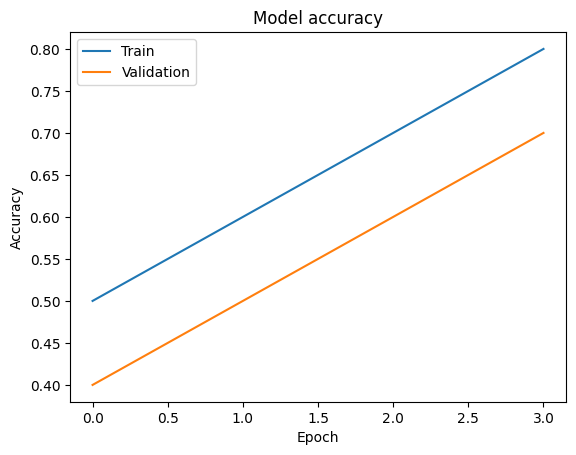

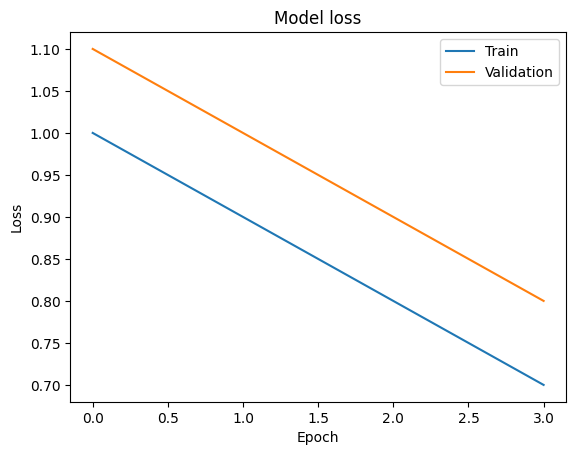

In [45]:
import matplotlib.pyplot as plt

def plot_accuracy_and_loss(history):
    # Plot training & validation accuracy values
    plt.plot(history['accuracy'], label='Train')
    plt.plot(history['val_accuracy'], label='Validation')
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend()

    # Show the accuracy plot
    plt.show()

    # Plot training & validation loss values
    plt.plot(history['loss'], label='Train')
    plt.plot(history['val_loss'], label='Validation')
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend()

    # Show the loss plot
    plt.show()

# Assuming train_model_history contains training history as a dictionary
# Replace it with your actual model's training history dictionary
plot_accuracy_and_loss(train_model_history)


After adding the Dropout layers, the validation accuracy and validation loss are much better. Let's check now the prediction for the test set.


## <a id="58">Prediction accuracy with the new model</a>

Let's re-evaluate the test prediction accuracy with the new model.

In [46]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.20200078189373016
Test accuracy: 0.9276999831199646


Also the test accuracy improved. The test accuracy is now approximately 0.93.

In [48]:
# Get the predicted probabilities for each class
predicted_probabilities = model.predict(X_test)

# Get the predicted classes by finding the index of the class with the highest probability
predicted_classes = predicted_probabilities.argmax(axis=-1)

# Assuming y_true contains the true labels for the test data
# Replace it with your actual true labels
y_true = test_data.iloc[:, 0]

# Now you can proceed with plotting the confusion matrix or any other evaluation metric


313/313 [==============================] - 7s 19ms/step


In [50]:
print("Length of predicted classes (p):", len(p))
print("Length of true labels (y):", len(y))


Length of predicted classes (p): 10000
Length of true labels (y): 10000


In [51]:
correct = np.where(p == y)[0]
incorrect = np.where(p != y)[0]


In [52]:
print("Correct predicted classes:",correct.shape[0])
print("Incorrect predicted classes:",incorrect.shape[0])

Correct predicted classes: 9277
Incorrect predicted classes: 723


In [53]:
target_names = ["Class {} ({}) :".format(i,labels[i]) for i in range(NUM_CLASSES)]
print(classification_report(y_true, predicted_classes, target_names=target_names))

                         precision    recall  f1-score   support

Class 0 (T-shirt/top) :       0.89      0.87      0.88      1000
    Class 1 (Trouser) :       1.00      0.99      0.99      1000
   Class 2 (Pullover) :       0.90      0.88      0.89      1000
      Class 3 (Dress) :       0.93      0.94      0.93      1000
       Class 4 (Coat) :       0.86      0.91      0.89      1000
     Class 5 (Sandal) :       0.98      0.98      0.98      1000
      Class 6 (Shirt) :       0.80      0.78      0.79      1000
    Class 7 (Sneaker) :       0.96      0.97      0.96      1000
        Class 8 (Bag) :       0.99      0.98      0.98      1000
 Class 9 (Ankle Boot) :       0.97      0.97      0.97      1000

               accuracy                           0.93     10000
              macro avg       0.93      0.93      0.93     10000
           weighted avg       0.93      0.93      0.93     10000




The best accuracy is obtained for Class 1, Class 5, Class 8, Class 9  and Class 7. Worst accuracy is for Class 6.   

The recall is highest for Class 8, Class 5 and smallest for Class 6 and Class 4.    

f1-score is highest for Class 1, Class 5 and Class 8 and smallest for Class 6 followed by Class 4 and Class 2.  

Let's also inspect some of the images. We created two subsets of the predicted images set, correctly and incorrectly classified.

# <a id="6">Visualize classified images</a>

## <a id="61">Correctly classified images</a>


We visualize few images correctly classified.

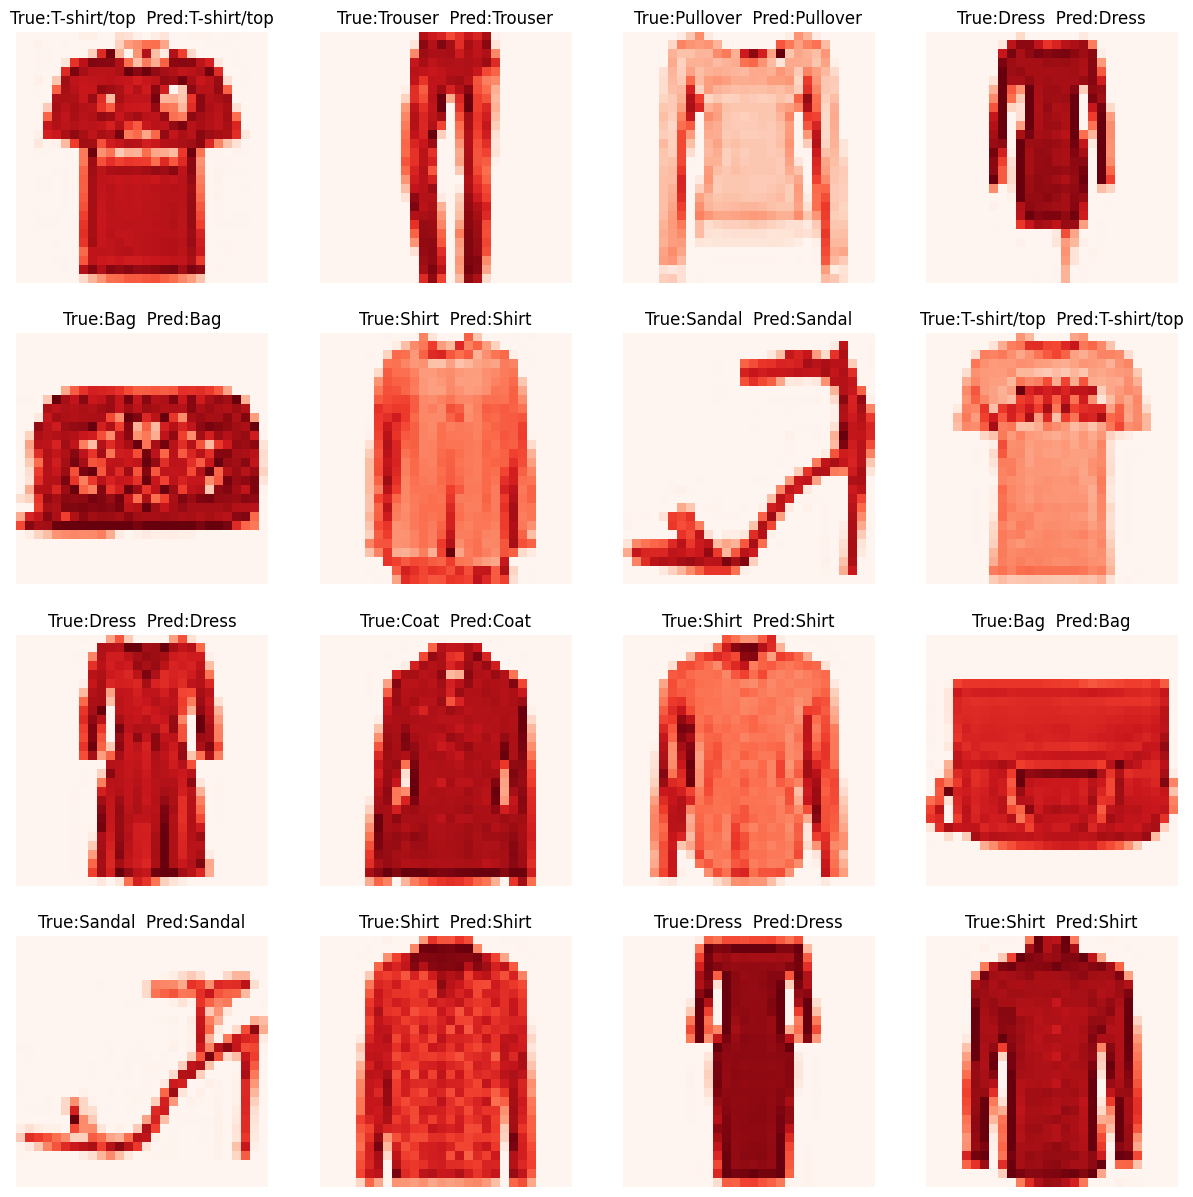

In [56]:
def plot_images(data_index,cmap="Blues"):
    # Plot the sample images now
    f, ax = plt.subplots(4,4, figsize=(15,15))

    for i, indx in enumerate(data_index[:16]):
        ax[i//4, i%4].imshow(X_test[indx].reshape(IMG_ROWS,IMG_COLS), cmap=cmap)
        ax[i//4, i%4].axis('off')
        ax[i//4, i%4].set_title("True:{}  Pred:{}".format(labels[y_true[indx]],labels[predicted_classes[indx]]))
    plt.show()

plot_images(correct, "Reds")

## <a id="62">Incorrectly classified images</a>

Let's see also few images incorrectly classified.

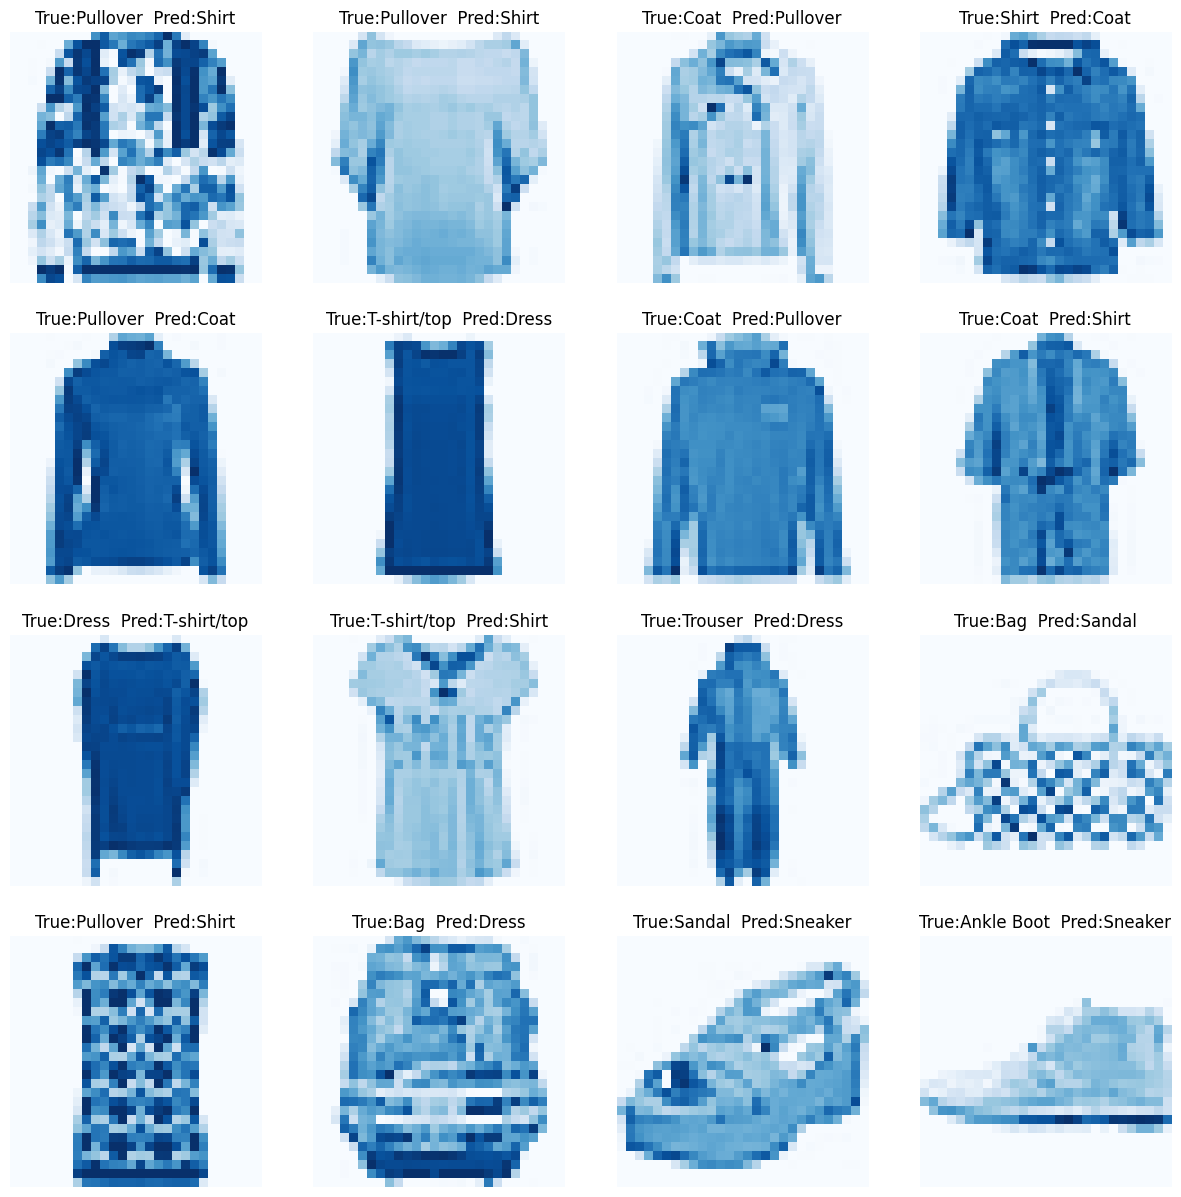

In [57]:
plot_images(incorrect, "Blues")